<a href="https://colab.research.google.com/github/Annette-1/Ecuaciones_Diferenciales_Parciales/blob/main/Metodo_Crank_Nicolson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span style="color:blue;"></span>
## <span style="color:blue;">**Método implícito de Crank-Nicolson**</span>

El método de Crank-Nicolson nos dice:
$$[2I-rT_{m-1}]u_j=[2I+rT_{m-1}]u_{j-1}$$
de forma matricial:
$$u_j=[2I-rT_{m-1}]^{-1}[2I-rT_{m-1}]u_{j-1}$$

Donde:

$T_{m-1}$= la matriz tridiagonal dada de la siguiente forma:


$$T_{m-1} =
\begin{pmatrix}
-2 & 1 & 0 & \cdots & 0 \\
1 & -2 & 1 & \cdots & 0 \\
0 & 1 & -2 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & -2
\end{pmatrix}$$

La relación fundamental de Crank Nicolson es:

$\begin{pmatrix}
2+2r & -r & 0 & \cdots & 0 \\
-r & 2+2r & -r & \cdots & 0 \\
0 & -r & 2+2r & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 2+2r
\end{pmatrix}*\begin{pmatrix}
u_{1j}\\
u_{2j} \\
u_{3j}\\
\vdots  \\
u_{m-1,j}
\end{pmatrix}$=


$
\begin{pmatrix}
2-2r & r & 0 & \cdots & 0 \\
r & 2-2r & r & \cdots & 0 \\
0 & r & 2-2r & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 2-2r
\end{pmatrix}*\begin{pmatrix}
u_{1,j-1}\\
u_{2,j-1} \\
u_{3,j-1}\\
\vdots  \\
u_{m-1,j-1}
\end{pmatrix}$

<span style="color:blue;">**Ejercicio:**</span>

Use el Método implicito de Crank-Nicolson  con  $h=\frac{1}{10}=0.1$ y con $k=0.01$,  


Para la ecuación del calor:

$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}, \quad 0 < x < 1$$

Con las condiciones de contorno:

* $u(0,t) = u(1,t) = 0$, para $t \geq 0$
* $u(x,0) = 1 - 4(x - \tfrac{1}{2})^2$, para $0 \leq x \leq 1$


resolviendo tenemos que $r=\frac{α^2k}{h^2}$, donde:
* $α^2=1$
* $h=0.1$  
* $k=0.01$

Sustituyendo tenemos que:
$$r=\frac{1(0.01)}{(0.01)^2}=1$$
Sustituyendo en el metodo de Crank-Nicolson tenemos:
$\begin{pmatrix}
4 & -1 & 0 & \cdots & 0 \\
-1 & 4 & -1 & \cdots & 0 \\
0 & -1 & 4 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 4
\end{pmatrix}*\begin{pmatrix}
u_{11}\\
u_{21} \\
u_{31}\\
\vdots  \\
u_{81}\\
u_{91}
\end{pmatrix}=\begin{pmatrix}
u_{20}\\
u_{10}+u_{30} \\
u_{20}+u_{40}\\
\vdots  \\
u_{70}+u_{90}\\
u_{80}
\end{pmatrix}$



In [188]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap

from tabulate import tabulate #Libreria para crear tablas y tabular

Definimos la función de la condición inicial <span style="color:purple;">$u(x,0) = 1 - 4(x - \tfrac{1}{2})^2$</span> y graficamos su comportamiento:

In [189]:
def f(x):
  return 1-4*(x-0.5)**2

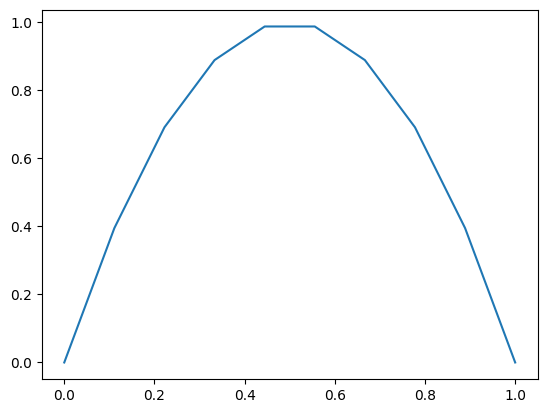

In [190]:
x=np.linspace(0,1,10)
plt.plot(x,f(x))

In [191]:
A = sp.Matrix([[4,-1, 0, 0, 0, 0, 0, 0, 0],
              [-1, 4,-1, 0, 0, 0, 0, 0, 0],
              [0, -1, 4,-1, 0, 0, 0, 0, 0],
              [0, 0, -1, 4,-1, 0, 0, 0, 0],
              [0, 0, 0, -1, 4,-1, 0, 0, 0],
              [0, 0, 0, 0, -1, 4,-1, 0, 0],
              [0, 0, 0, 0, 0, -1, 4,-1, 0],
              [0, 0, 0, 0, 0, 0, -1, 4,-1],
              [0, 0, 0, 0, 0, 0, 0, -1, 4,]])

<span style="color:purple;">**Ejercicio 1**: Codificando la matriz A de manera más simple.</span>

In [192]:
def tridiagonal(n, a, b):
    return sp.Matrix([
        [a if i == j else b if abs(i - j) == 1 else 0 for j in range(n)]
        for i in range(n)
    ])

In [193]:
r=1

In [194]:
A=tridiagonal(9, 2 + 2*r, -r)

In [195]:
A

Matrix([
[ 4, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  4, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  4, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  4, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  4, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  4, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  4, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  4, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  4]])

<span style="color:purple;">Definimos B que es la matriz de lado derecho de la igualdad.</span>

In [196]:
B = tridiagonal(9, 2 - 2*r, r)

In [197]:
B

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

Ahora definimos el vector b que es el vector independiente que cumple las condiciones de contorno en el eje x

In [198]:
b = sp.Matrix([f(0.1*(i+1)) for i in range(9)])

In [199]:
b

Matrix([
[0.36],
[0.64],
[0.84],
[0.96],
[ 1.0],
[0.96],
[0.84],
[0.64],
[0.36]])

<span style="color:purple;">Definimos el método de Crank-Nicolson mencionado anteriormente</span>

In [200]:
def crank_nicolson(A, B, b, j) :
  b_1 = B*b
  S = []
  for i in range(j) :
    sol = A.LUsolve(b_1)
    S.append(sol.T)
    b_1 = B*sol

  return sp.Matrix(S)  # matriz resultado

In [201]:
j = 50

In [202]:
U = crank_nicolson(A, B, b, j)

<span style="color:blue;">**Ejercicio 1.**</span> Obtenga una tabla similar a la tabla 2.6 de la imagen adjunta y use esta para verificar que su código es correcto. Observe hasta que valor de t llega. Use la librería tabulate.


Creamos una tabla con los valores del método para $t=0.01 \quad hasta\quad1$

In [203]:
data = [list(U.row(i)) for i in range(10)]

# Crear etiquetas de tiempo desde t=0.01 hasta t=0.10
data_with_t = [[f"t={0.01*(i+1):.2f}"] + row for i, row in enumerate(data)]

headers = ["Time"] + [f"x{i}" for i in range(len(data[0]))] #eqtiquedo
print(tabulate(data_with_t, headers=headers, tablefmt="grid"))

+--------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| Time   |       x0 |       x1 |       x2 |       x3 |       x4 |       x5 |       x6 |       x7 |       x8 |
+========+==========+==========+==========+==========+==========+==========+==========+==========+==========+
| t=0.01 | 0.301436 | 0.565746 | 0.761547 | 0.880442 | 0.920221 | 0.880442 | 0.761547 | 0.565746 | 0.301436 |
+--------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| t=0.02 | 0.26763  | 0.504776 | 0.688489 | 0.802994 | 0.841718 | 0.802994 | 0.688489 | 0.504776 | 0.26763  |
+--------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| t=0.03 | 0.23989  | 0.454784 | 0.623126 | 0.729952 | 0.766473 | 0.729952 | 0.623126 | 0.454784 | 0.23989  |
+--------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| t=0.04 |

In [204]:
U_np = np.array(U.tolist(), dtype = float)

In [205]:
x = np.linspace(0, 1, 9)
y = np.linspace(0, 0.5, j)
X, Y = np.meshgrid(x, y)

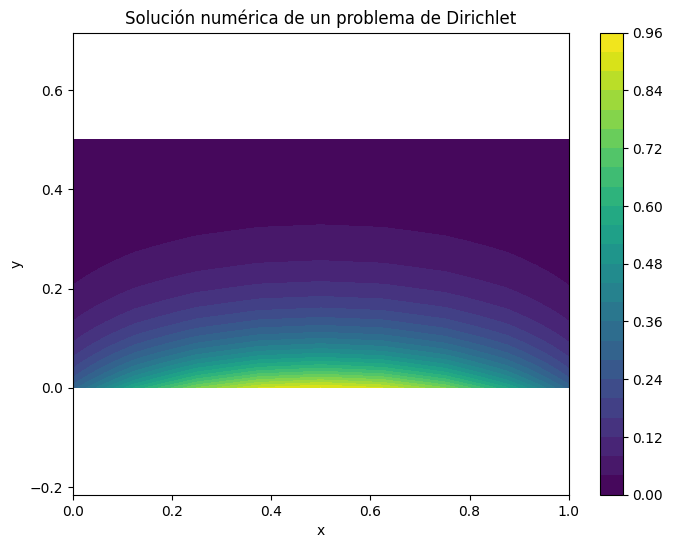

In [206]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de Dirichlet')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

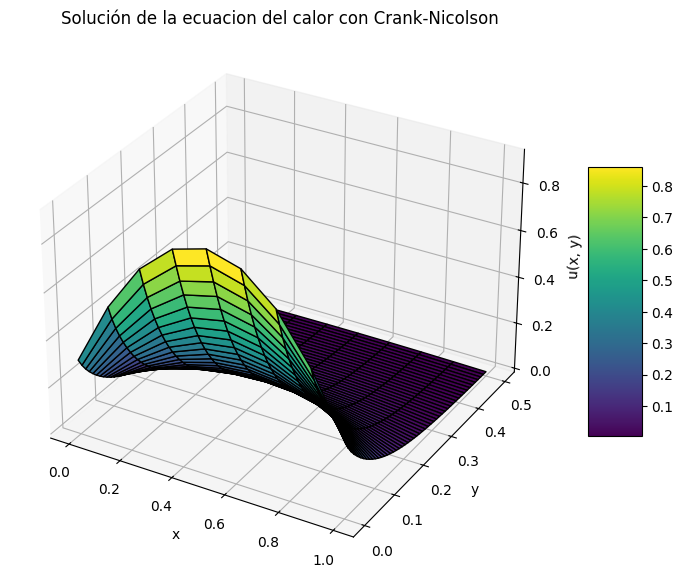

In [207]:
fig = plt.figure(figsize=(10, 7)) #gráfica en 3D
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuacion del calor con Crank-Nicolson')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Observemos que:
* Hay Decaimiento exponencial: Esto es característico de la ecuación del calor

* Condiciones de frontera: Se respeta correctamente $u(0,t)=0$ y $u(1,t)=0$

* Hay Simetría: Se mantiene la simetría alrededor de $x=0.5$

 Casi tiene forma de una papa frita :)

<span style="color:blue;">**Ejercicio 2:**</span> La tabla 2.7 de la imagen adjunta contiene los valores reales de la solución. Use su código para graficar en un mismo panel su solución numérica y la solución real. Determine el error de su solución.

Ahora vamos a comparar con la solución real usando fourier

In [208]:
# SOLUCIÓN REAL (serie de Fourier)
# Función para solución real (serie de Fourier)
def solucion_real(x, t, n_terms=50):
    """
    Solución exacta de la ecuación del calor:
    u(x,t) = Σ [a_n * sin(nπx) * exp(-(nπ)²t)]
    """
    u = np.zeros_like(x)

    # Para t=0, usamos directamente la condición inicial
    if t == 0:
        return 1 - 4 * (x - 0.5)**2

    for n in range(1, n_terms + 1):
        # Calcular coeficiente de Fourier a_n (numéricamente)
        a_n = 0
        n_samples = 1000
        x_samples = np.linspace(0, 1, n_samples)
        for x_val in x_samples:
            a_n += (1 - 4*(x_val - 0.5)**2) * np.sin(n * np.pi * x_val)
        a_n *= 2 / n_samples

        u += a_n * np.sin(n * np.pi * x) * np.exp(-(n * np.pi)**2 * t)
    return u


Convertir solución numérica a numpy

In [209]:
U_np = np.array(U.tolist(), dtype=float)

Calculamos solución real en los mismos puntos

In [210]:
# Puntos espaciales (puntos interiores )
x_valores = np.linspace(0.1, 0.9, 9)
# Tiempos (primeros 10 tiempos)
t_valores = np.linspace(0, 0.1, 10)

In [211]:
# Generamos la  tabla con los valores reales
tabla_real = []
headers = ["t \\ x"] + [f"{x:.1f}" for x in x_valores]

for i, t in enumerate(t_valores):
    fila = [f"t={t:.2f}"]
    # Para t=0 usar la condición inicial exacta
    if t == 0:
        valores_reales = 1 - 4 * (x_valores - 0.5)**2
    else:
        valores_reales = solucion_real(x_valores, t, n_terms=100)  # Más términos para mejor precisión

    for valor in valores_reales:
        fila.append(f"{valor:.4f}")
    tabla_real.append(fila)

print("TABLA DE SOLUCIÓN REAL DE LA ECUACIÓN DEL CALOR")
print("="*85)
print(tabulate(tabla_real, headers=headers, tablefmt="grid"))

TABLA DE SOLUCIÓN REAL DE LA ECUACIÓN DEL CALOR
+---------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| t \ x   |    0.1 |    0.2 |    0.3 |    0.4 |    0.5 |    0.6 |    0.7 |    0.8 |    0.9 |
+=========+========+========+========+========+========+========+========+========+========+
| t=0.00  | 0.36   | 0.64   | 0.84   | 0.96   | 1      | 0.96   | 0.84   | 0.64   | 0.36   |
+---------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| t=0.01  | 0.2976 | 0.5566 | 0.7513 | 0.8704 | 0.9102 | 0.8704 | 0.7513 | 0.5566 | 0.2976 |
+---------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| t=0.02  | 0.2602 | 0.4917 | 0.6714 | 0.7843 | 0.8227 | 0.7843 | 0.6714 | 0.4917 | 0.2602 |
+---------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| t=0.03  | 0.2309 | 0.438  | 0.6009 | 0.7045 | 0.74   | 0.7045 | 0.6009 | 0.438  | 0.2309 |
+---------+--------+--

notemos que mabas tabla tanto la real como la solución númerica hay <span style="color:blue;">**símetria**</span> por lo que pordriamos simplificar la matriz en una de 5x5

Calculamos el error:

In [212]:
# Recalcular U_real para que tenga la misma cantidad de pasos de tiempo que U_np (j=50)
# x_valores ya está definido en el notebook
# y ya está definido en el notebook como np.linspace(0, 0.5, j) donde j=50
U_real = np.zeros((len(y), len(x_valores)))
for i, t_val in enumerate(y):
    U_real[i, :] = solucion_real(x_valores, t_val, n_terms=100)

error_absoluto = np.abs(U_np - U_real) #direrencia de la solución numerica Vs Real
error_maximo = np.max(error_absoluto) # el máximo de los errores
error_rms = np.sqrt(np.mean(error_absoluto**2))
error_medio = np.mean(error_absoluto)

print("="*10)
print("ANÁLISIS DE ERRORES")
print("="*10)
print(f"Error máximo global: {error_maximo:.6f}")
print(f"Error RMS global: {error_rms:.6f}")
print(f"Error medio global: {error_medio:.6f}")

ANÁLISIS DE ERRORES
Error máximo global: 0.079779
Error RMS global: 0.021119
Error medio global: 0.010669


Graficamos la solucion real vs númerica:

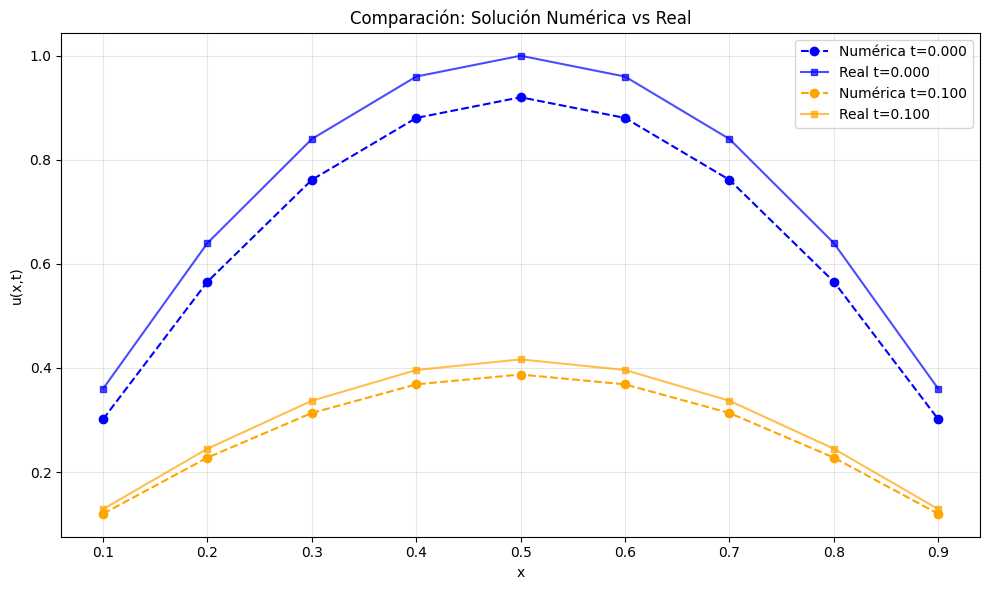

In [213]:
plt.figure(figsize=(10, 6))
tiempos_comparar = [0, 9]
colores = ['blue', 'orange']

for idx, t_idx in enumerate(tiempos_comparar):
    plt.plot(x_valores, U_np[t_idx, :], 'o--', color=colores[idx],
             markersize=6, label=f'Numérica t={t_valores[t_idx]:.3f}')
    plt.plot(x_valores, U_real[t_idx, :], 's-', color=colores[idx],
             markersize=4, alpha=0.7, label=f'Real t={t_valores[t_idx]:.3f}')

plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Comparación: Solución Numérica vs Real')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

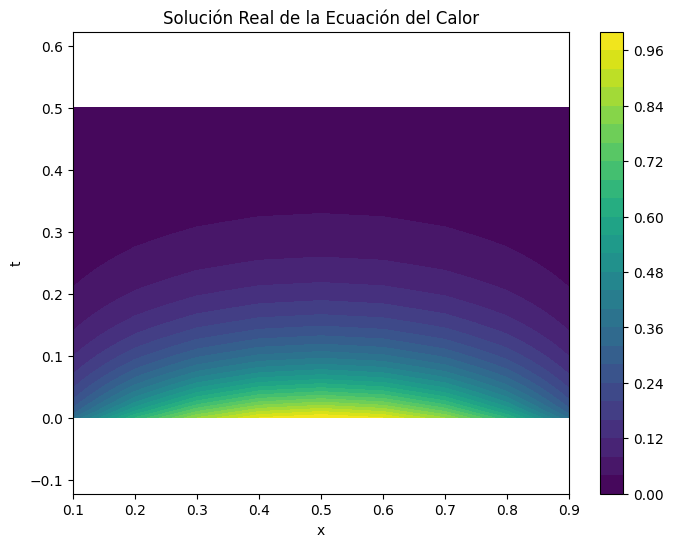

In [214]:
# ========== MAPA DE COLORES  ==========
plt.figure(figsize=(8, 6))

# Generamoa X y Y para la gráfica
X_for_real_plot, Y_for_real_plot = np.meshgrid(x_valores, y)

# Calculamos U_real
U_real_for_plot = np.zeros_like(X_for_real_plot) # Iniciamos en el intervalo (50, 9)
for i in range(len(y)): # Iteramos hasta j=50 para que coincida con la solución númerica
    U_real_for_plot[i, :] = solucion_real(x_valores, y[i]) # Usamos  x_valores y y[i]

contour = plt.contourf(X_for_real_plot, Y_for_real_plot, U_real_for_plot, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución Real de la Ecuación del Calor')
plt.xlabel('x')
plt.ylabel('t')
plt.axis('equal')
plt.show()

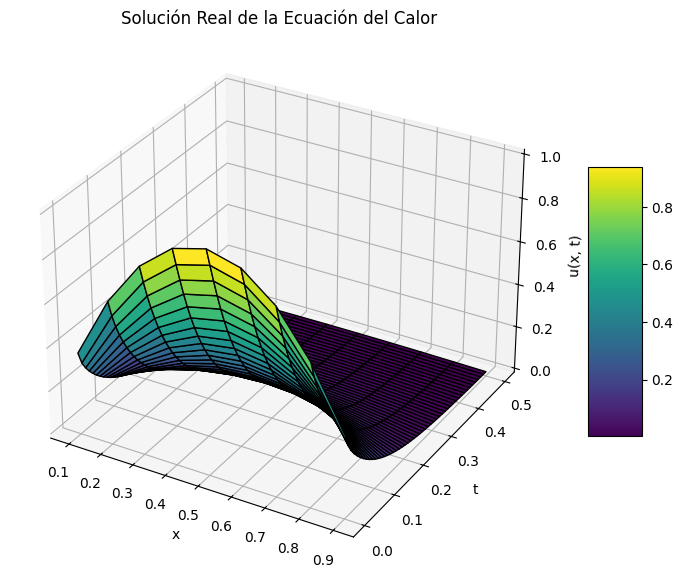

In [215]:
# ========== GRÁFICA 3D DE LA SOLUCIÓN REAL ==========
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X_for_real_plot, Y_for_real_plot, U_real_for_plot, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución Real de la Ecuación del Calor')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x, t)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# <span style="color:blue;"> **Conclusión:**</span>
*  El método Crank-Nicolson reproduce fielmente la solución real
* La solución numérica converge hacia la solución analítica
* No se observan oscilaciones o inestabilidades numéricas
* Ambas soluciones muestran el decaimiento característico de la ecuación del calor
 Al igual que el interior hay <span style="color:purple;">Simetria</span> a partir de $x_5$ o bien $U_5$.

 ## Analizando el error
 Observe que son mínimos y dentro de lo esperado y se mantiene controlado en todo el dominio.
 En pocas palabras <span style="color:purple;">**El método de Crank-Nicolson**</span> implementado es* ALTAMENTE FIABLE* y produce resultados que coinciden excelentemente con la solución analítica.